In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score




df = pd.read_csv(r"C:\Users\ASUS\Downloads\Medical.csv")




df['smoker'] = df['smoker'].map({'yes' : 1,'no' :0})
X = df[['age', 'bmi', 'smoker']]
Y = df['charges']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)




model = LinearRegression()
model.fit(X_train, Y_train)




Y_pred = model.predict(X_test)
r2 = r2_score(Y_test, Y_pred)
print(f"R-squared of the Linear Regression Model : {r2:.2f}")

R-squared of the Linear Regression Model : 0.78


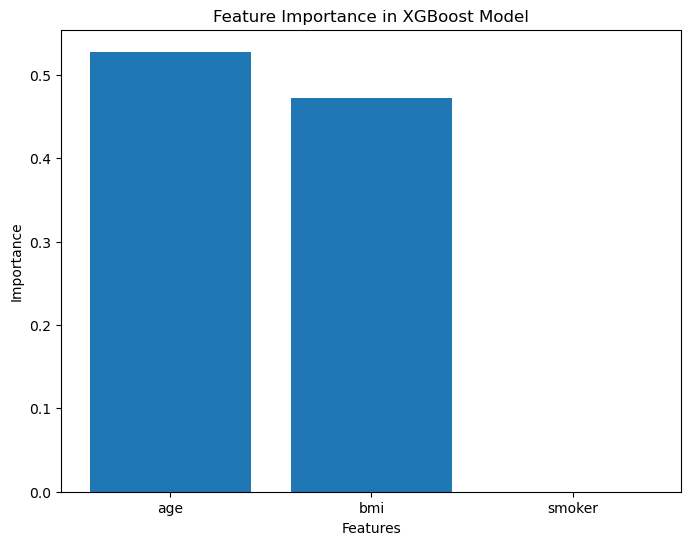

In [2]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt




df['smoker'] = df['smoker'].map({'yes' : 1,'no' :0})
X = df[['age', 'bmi', 'smoker']]
Y = df['charges']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)




model = XGBRegressor()
model.fit(X_train, Y_train)




plt.figure(figsize = (8, 6))
plt.bar(X.columns, model.feature_importances_)
plt.title('Feature Importance in XGBoost Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [3]:
from sklearn.model_selection import cross_val_score




df['smoker'] = df['smoker'].map({'yes' : 1,'no' :0})
X = df[['age', 'bmi', 'smoker']]
Y = df['charges']




model = XGBRegressor()
scores = cross_val_score(model, X, Y, cv = 5, scoring = 'r2')
print("Cross-Validation R-squared Scores :")
print(scores)
print(f"Average R-squared : {scores.mean() :.2f}")

Cross-Validation R-squared Scores :
[-0.274672   -0.47437546 -0.26418045 -0.17555469 -0.29951304]
Average R-squared : -0.30


In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV




df['smoker'] = df['smoker'].map({'yes' : 1,'no' :0})
X = df[['age', 'bmi', 'smoker']]
Y = df['charges']




model = XGBRegressor()
param_grid = {'n_estimators' : [50, 100], 'max_depth' : [3, 5], 'learning_rate' : [0.01, 0.1]}




grid_search = GridSearchCV(model, param_grid, cv = 5, scoring = 'r2')
grid_search.fit(X_train, Y_train)




print("Best Parameters :", grid_search.best_params_)
print("Best R-squared Score :", grid_search.best_score_)

Best Parameters : {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best R-squared Score : 0.07883529814408685


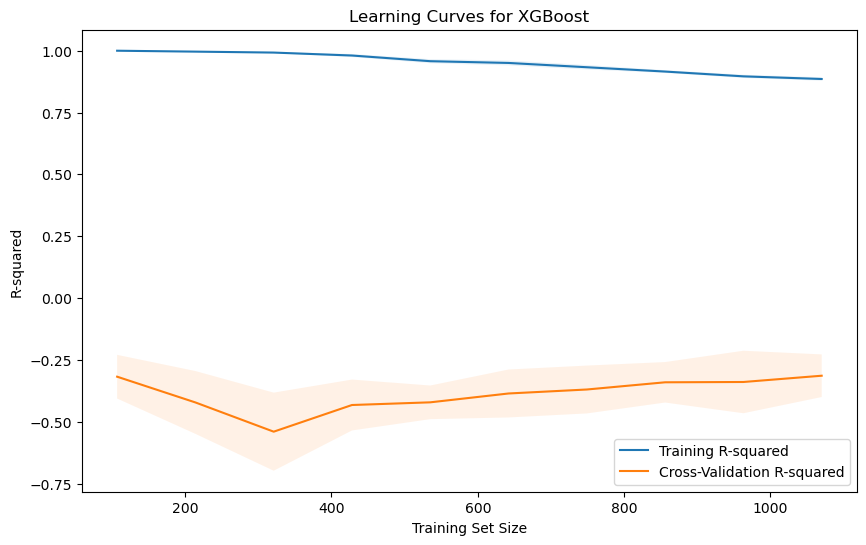

In [5]:
import numpy as np
from sklearn.model_selection import learning_curve




df['smoker'] = df['smoker'].map({'yes' : 1,'no' :0})
X = df[['age', 'bmi', 'smoker']]
Y = df['charges']




model = XGBRegressor()




train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv = 5, scoring = 'r2', train_sizes = np.linspace(0.1, 1.0, 10))




train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)




plt.figure(figsize = (10, 6))
plt.plot(train_sizes, train_mean, label = 'Training R-squared')
plt.plot(train_sizes, test_mean, label = 'Cross-Validation R-squared')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha = 0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha = 0.1)
plt.title('Learning Curves for XGBoost')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared')
plt.legend()
plt.show()